In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
Sample = pd.read_csv('Submission.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


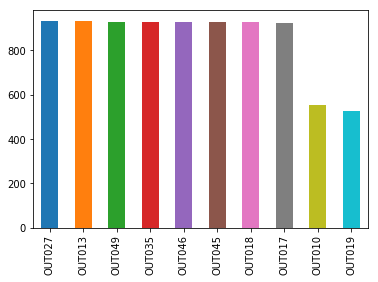

In [4]:
pd.value_counts(train['Outlet_Identifier']).plot.bar()

We can see that almost all entries have about the same number of product entries except outlets 10 and 19.

## EDA 

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can notice some outliers in some column.
Let us visualize them in boxplots and hisotograms with KDE

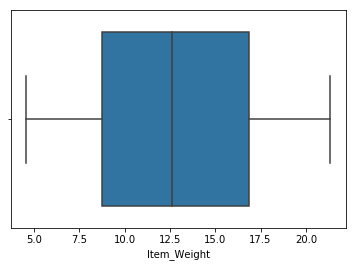

In [6]:
sns.boxplot(x=train["Item_Weight"])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


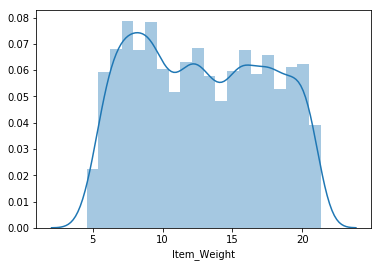

In [7]:
sns.distplot(train["Item_Weight"].dropna())

No outlliers here, and we can see that the most of the weights are concentrated between approximately 5 and 20

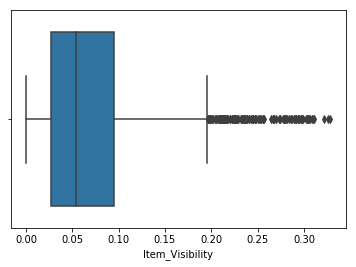

In [8]:
sns.boxplot(x=train["Item_Visibility"])

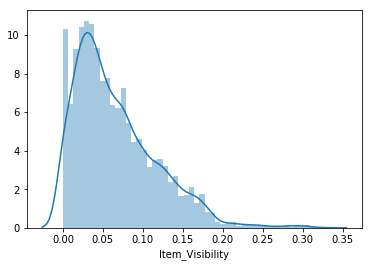

In [9]:
sns.distplot(train["Item_Visibility"])

Outliers in the item visibility column, and it is right skewed

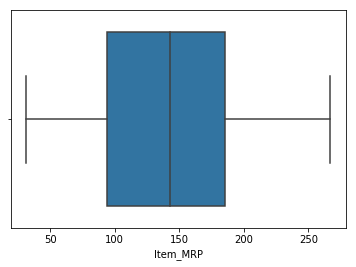

In [10]:
sns.boxplot(x=train["Item_MRP"])

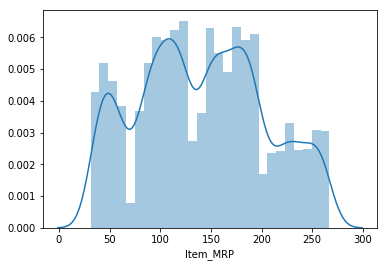

In [11]:
sns.distplot(train["Item_MRP"])

Odd distribution and the major MRPs are around 50, 100, 175 and 250.

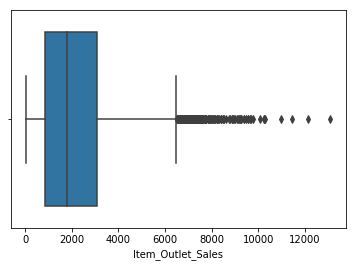

In [12]:
sns.boxplot(x=train["Item_Outlet_Sales"])

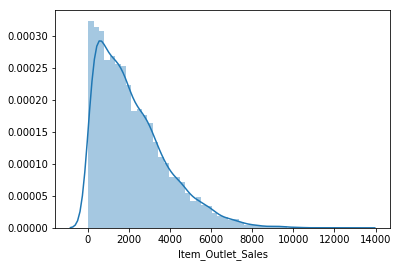

In [13]:
sns.distplot(train["Item_Outlet_Sales"])

We can see that there are outliers in the sales and it is right skewed

Let us plot bivariate comparisons of these numerical variables to check for the relationship between them

In [14]:
train_numerical = train[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].dropna()

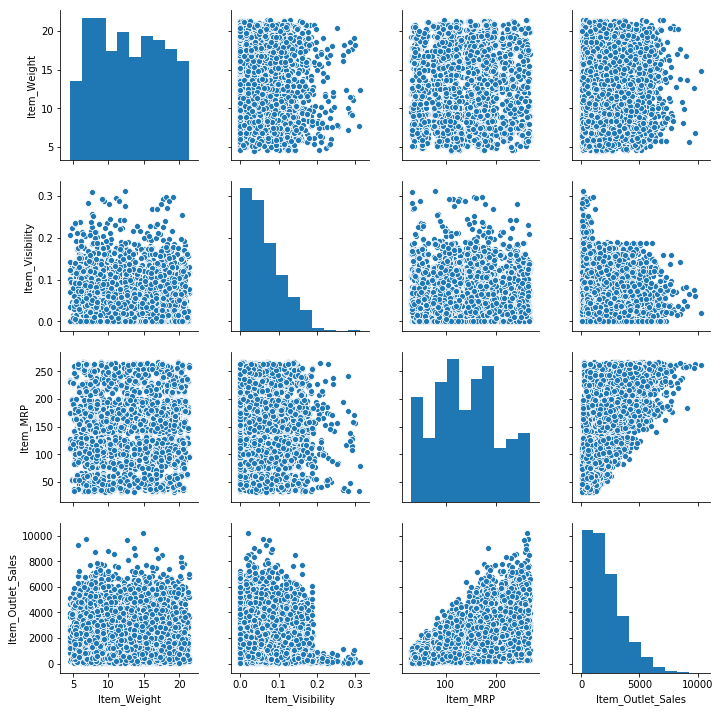

In [15]:
sns.pairplot(train_numerical)

The following can be deduced from studying these plots:
1. Most items with high item visibility have low item outlet sales. 
2. Most items with low MRP do not have high outlet sales
3. Most items with Items with high outlet sales have high MRPs
4. Items with high outlet sales seem to have relatively low visibility

### Let us explore the categorical variables

Let us begin by seeing what year each store was founded

In [16]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [17]:
#sort data by year

train_year_sort = train.sort_values(by = 'Outlet_Establishment_Year', ascending = False)

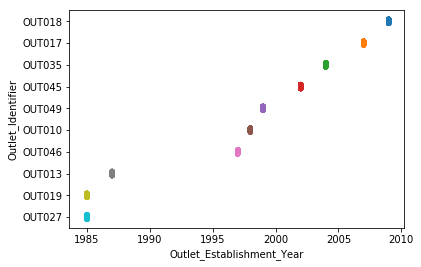

In [18]:
#plot stripplot to show outlet establishment year

sns.stripplot(x = 'Outlet_Establishment_Year', y = 'Outlet_Identifier', data = train_year_sort)

We can see that most (7 out of 10) stores were founded from 1997 upwards
Only three were founded before 1990

Next, we look at establishment year against sales

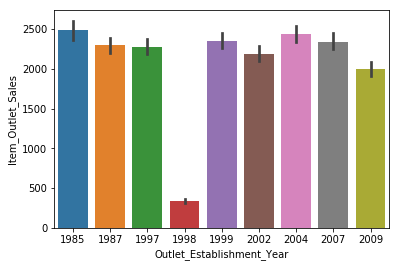

In [19]:
#sales vs establishment year 

sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = train_year_sort)

We can see that the store established in 1998 has the lowest item outlet sales

Next, we look at the relationship between the item outlet sales and other categorical variables

In [20]:
#sort data by outlet sales

train_outlet_sort = train.sort_values(by = 'Item_Outlet_Sales', ascending = False)

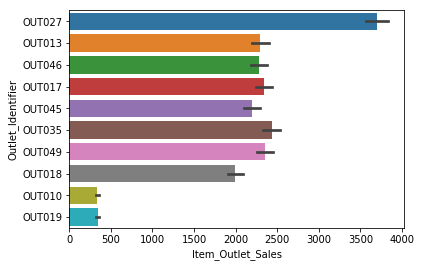

In [21]:
#sales vs outlet identifier 

sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Identifier', data = train_outlet_sort)

We see that store outlet 27 has the highest sales; the other stores then have around the same sales; then stores 10 and 19 have the lowest sales

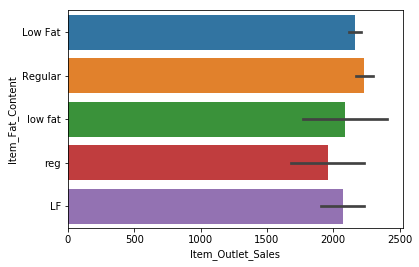

In [22]:
#sales vs fat content
sns.barplot(x = 'Item_Outlet_Sales', y = 'Item_Fat_Content', data = train_outlet_sort)

Nothing can really be said about the fat content and the item sales

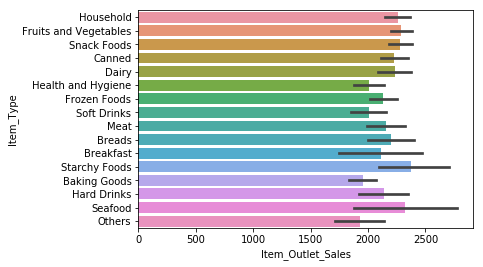

In [23]:
#sales vs item type
sns.barplot(x = 'Item_Outlet_Sales', y = 'Item_Type', data = train_outlet_sort)

We can see that Starchy foods and sea food have the highest number of item outlet sales
The lowest incude health and hygiene, soft drinks, baking goods and the others.

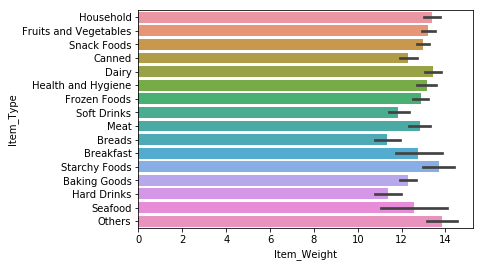

In [24]:
#Item weight vs Item Type
sns.barplot(x = 'Item_Weight', y = 'Item_Type', data = train_outlet_sort)

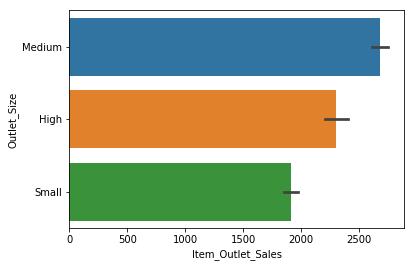

In [25]:
#sales vs outlet size

sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Size', data = train_outlet_sort)

Outlets with medium sizes seem to have the highest number of sales.

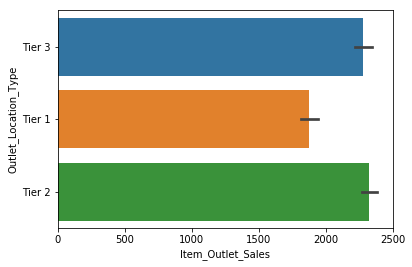

In [26]:
#sales vs outlet location

sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type', data = train_outlet_sort)

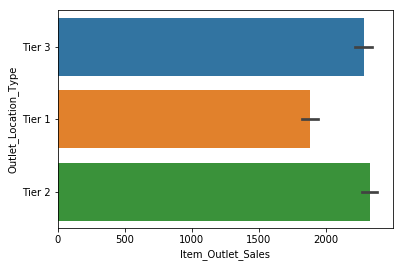

In [27]:
#sales vs outlet location

sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type', data = train_outlet_sort)

Tier 3 and Tier 2 have the highest sales

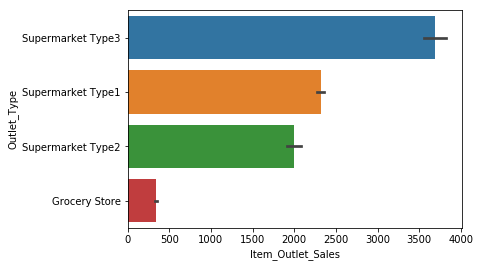

In [28]:
#sales vs outlet type
sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Type', data = train_outlet_sort)

Grocery stores have the lowest sales, then supermarket types 3 has the highest number of sales

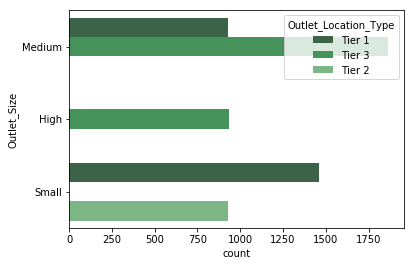

In [29]:
sns.countplot(y="Outlet_Size", hue="Outlet_Location_Type", data=train, palette="Greens_d");

We can see that all outlets with high size are only located in tier 3. Also, we can see that small outlet sizes are located in tier 1 and 2. Finally, medium sizes are only in tier 1 and 3.

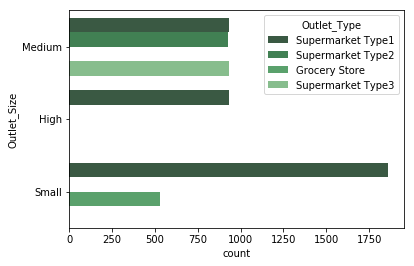

In [30]:
sns.countplot(y="Outlet_Size", hue="Outlet_Type", data=train, palette="Greens_d");

We see that all high outlet sizes are supermarket type 1. Most small sizes are also type 1 with the remaining being all grocery stores. Medium size are distributed between type 1, type 2 and type 3.

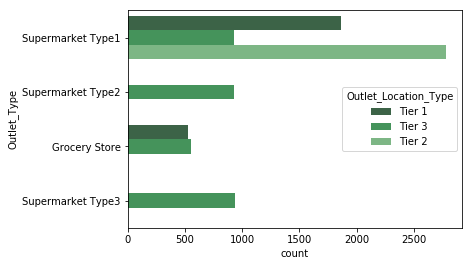

In [31]:
sns.countplot(y="Outlet_Type", hue="Outlet_Location_Type", data=train, palette="Greens_d");

We see that all supermarket type 3 are located in tier 3. Grocery stores are in tier 1 and tier 3 only. Supermarket type 2 are also only located in tier 3. Supermarket type 1 are mostly located in tier 2 and

We can use some of the information obtained above to input any missing variables we have.



Now we compare numerical variables again, but using categorical variables as points of references.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


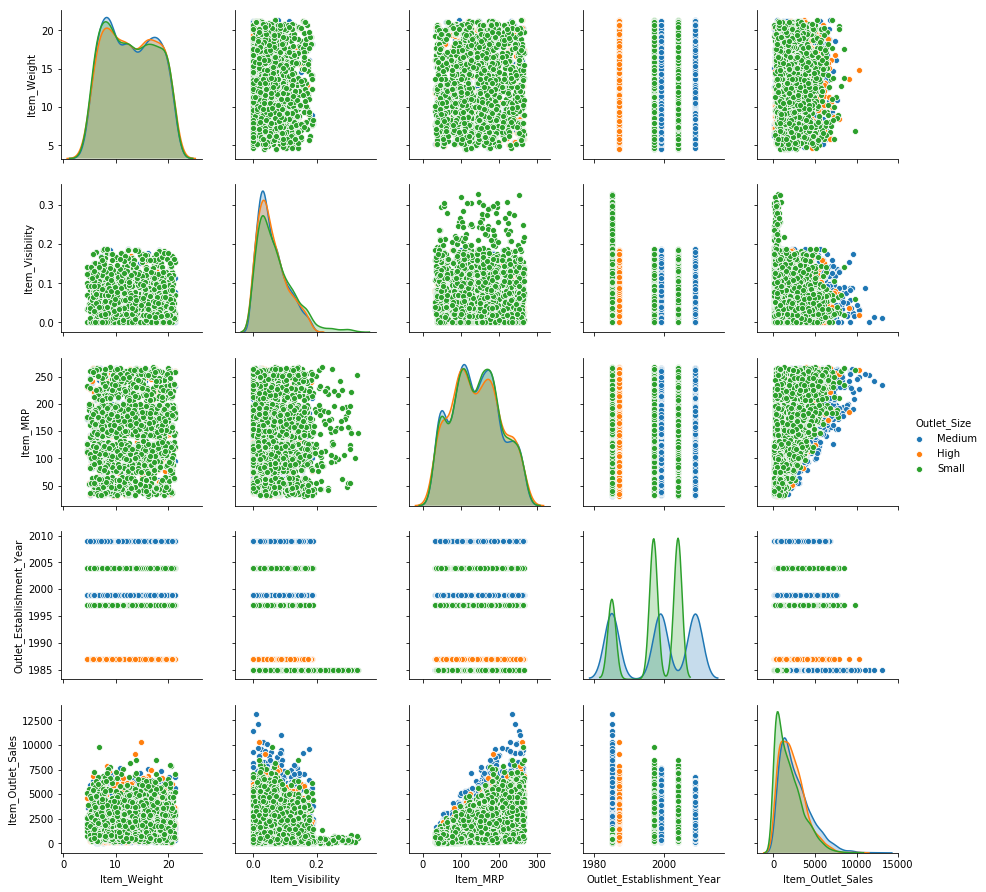

In [32]:
sns.pairplot(train, hue='Outlet_Size')

1. High outlet sales and high MRPs are mostly medium sized stores

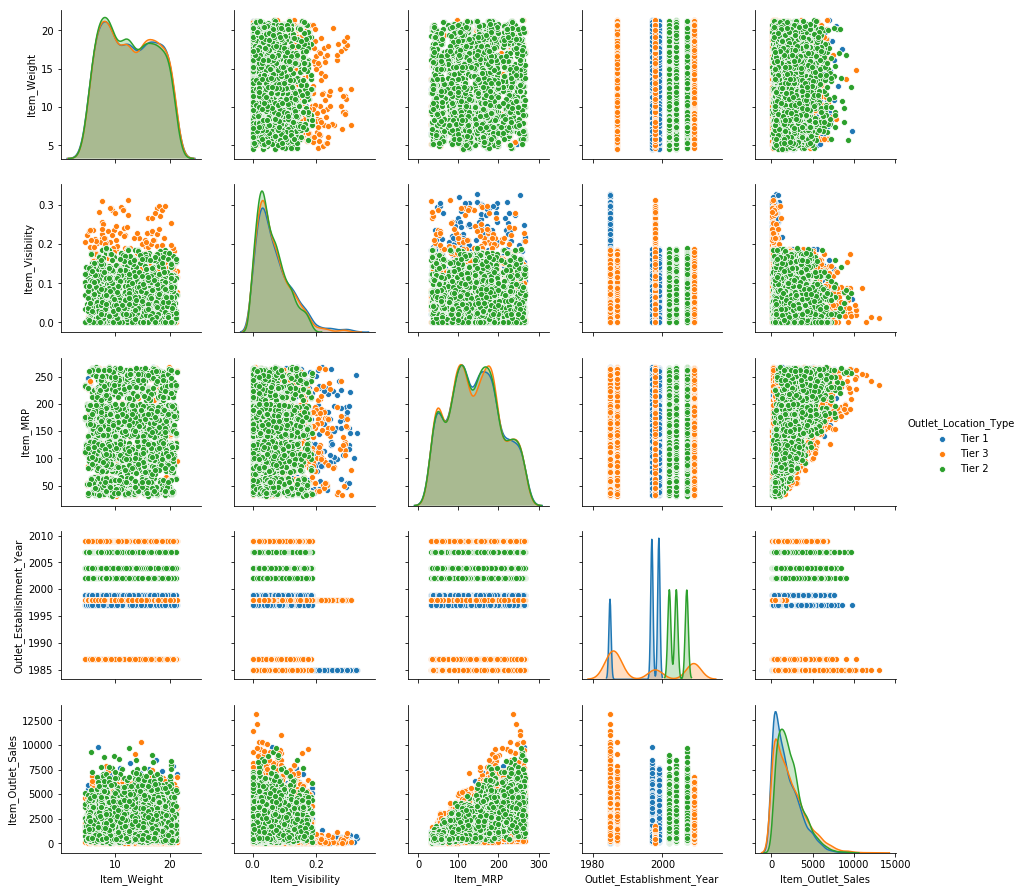

In [33]:
sns.pairplot(train, hue='Outlet_Location_Type')

1. Items with high item visibilty are either tier 1 or tier 3.
2. High item visibility and low outler sales are either tier 1 and tier 3. 
3. Highest sales and highest MRP - tier 3.

All the information obtained from our EDA will help us in creating new features and handling missing variables

## Data Cleaning

Handling missing entries

In [34]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We only have missing values in the weight column and outlet size column

Beginning with the weight column. Let us visualize the variation of item weight by outlet identifier again.
This is a good way to impute the missing values.

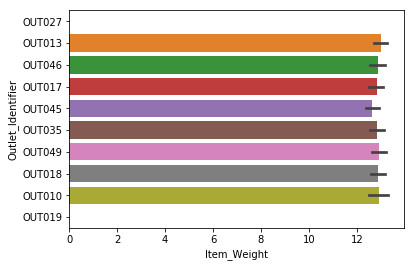

In [35]:
#Item weight vs Outlet Identifier
sns.barplot(x = 'Item_Weight', y = 'Outlet_Identifier', data = train_outlet_sort)

We can see that they have fairly the same weight distributions. So it is not a bad idea to fill the missing values with the mean of the weights.

Let us confirm with boxplots first.

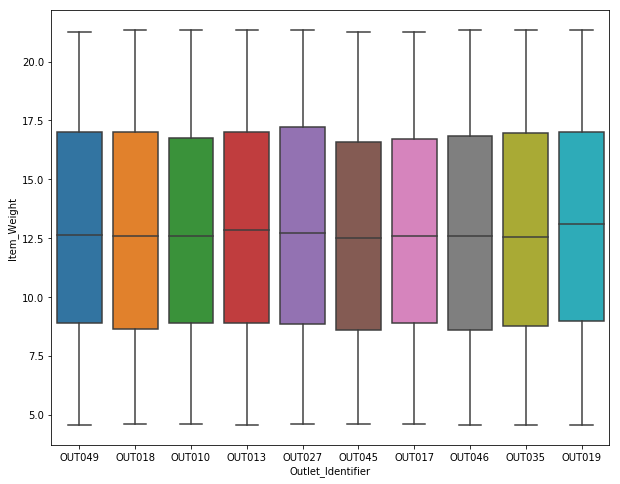

In [40]:
dataset = [train, test]
plt.figure(figsize=(10,8))
for data in dataset:
    data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
sns.boxplot(data=train, x='Outlet_Identifier', y='Item_Weight')
plt.show()

In [41]:
dataset = [train, test]
for data in dataset:
    data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [42]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We still have four missing weight values. We can just input them with the mean - 12.8

In [43]:
dataset = [train, test]
for data in dataset:
    data['Item_Weight'] = data['Item_Weight'].fillna(12.8)

In [44]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
#Missing values by outlet identifier

train[train['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

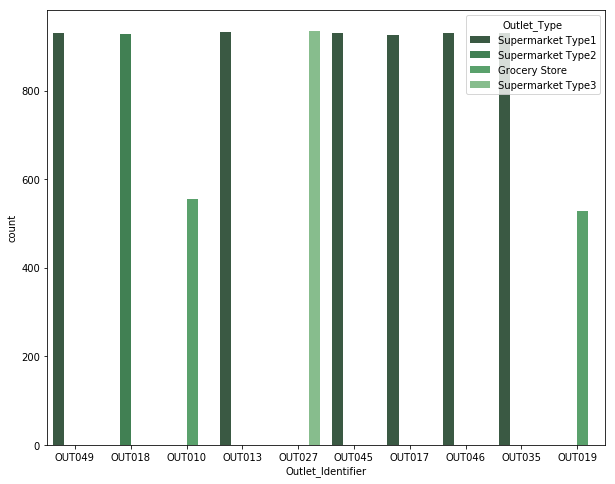

In [46]:
#Outlet identifier by Outlet type

plt.figure(figsize=(10,8))
sns.countplot(x="Outlet_Identifier", hue="Outlet_Type", data=train, palette="Greens_d")
plt.show()

We can see that all outlet size missing values are in OUT045, OUT017 and OUT010.
Outlets 45 and 17 are supermarket type1, while outlet 10 is a grocery store.
Remember from our EDA that all small outlet sizes are either grocery stores or supermarket type 1s only.
Supermarket type 1 also have medium and high sizes, but most of the supermarket type1s are small sizes.
Hence, we can inpute all missing values with the small outlet size.

In [47]:
dataset = [train, test]
for data in dataset:
    data['Outlet_Size'].fillna('Small', inplace=True)
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Handling repeated entries

Low Fat, LF and low fat all correspond to Low Fat, whilst reg and regular are both Regular

In [48]:
dataset = [train, test]
for data in dataset:
    data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat' :'Low Fat','reg':'Regular'})

## Feature Engineering, more Data Cleaning and more EDA

We will create some new features -
1. The first will be the age of the outlets. 2019 - establishment year
2. The second will be whether or not the item type is a consumable.
3. The third will be whether the item type is a food, drink or non consumable

In [49]:
dataset = [train,test]
for data in dataset:
    data['Outlet_Age'] = 2019 - data.Outlet_Establishment_Year
train.Outlet_Age.head()

0    20
1    10
2    20
3    21
4    32
Name: Outlet_Age, dtype: int64

In [50]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [51]:
dataset = [train,test]
for data in dataset:
    data['Consumable']=data['Item_Type']
    data['Consumable']=data['Consumable'].replace({'Fruits and Vegetables':1,'Snack Foods' : 1, 'Frozen Foods':1,
                                                   'Dairy':1,'Canned':1,'Soft Drinks':1,'Baking Goods':1,'Meat':1,'Breads':1, 
                                                   'Hard Drinks':1, 'Starchy Foods':1,'Breakfast':1, 'Seafood':1,
                                                  'Household':0,'Health and Hygiene':0,'Others':0})

In [52]:
# Create a broad category of Type of item

dataset = [train,test]
for data in dataset:
    data['Item_Type_New'] = data['Item_Identifier'].apply(lambda x: x[0:2])
    data['Item_Type_New'] = data['Item_Type_New'].map({'FD':'Food',
                                                                  'DR': 'Drinks',
                                                                  'NC': 'Non-Consumable'})

train['Item_Type_New'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_New, dtype: int64

Also, we can see that for the fat content, even non-edible items have fat contents, however this is wrong.
Hence, we need to create a third fat category for non edible items which will be zero fat.

In [53]:
# Impute 'Zero Fat' when 'Item_fat_Content' is Non-Edible

dataset = [train, test]
for data in dataset:
    data.loc[data['Item_Type_New']=="Non-Consumable",'Item_Fat_Content'] = "Zero Fat"
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Consumable,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20,1,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10,1,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20,1,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,21,1,Food
4,NCD19,8.93,Zero Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32,0,Non-Consumable


Encoding values

In [54]:
#save current data for possible reference
train1 = train

In [55]:
dataset = [train,test]
fat = {"Zero Fat": 0, "Low Fat": 1, "Regular": 2}
for data in dataset:
    data['Item_Fat_Content'] = data['Item_Fat_Content'].map(fat)

dataset = [train,test]
size = {"Small": 1, "Medium": 2, 'High':3}
for data in dataset:
    data['Outlet_Size'] = data['Outlet_Size'].map(size)
    
dataset = [train,test]    
tier = {"Tier 1": 1, "Tier 2": 2, 'Tier 3':3}
for data in dataset:
    data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map(tier)
    
dataset = [train,test]   
outlettype = {"Grocery Store": 1, "Supermarket Type1": 2, 'Supermarket Type2':3, 'Supermarket Type3':4}
for data in dataset:
    data['Outlet_Type'] = data['Outlet_Type'].map(outlettype)
    
dataset = [train,test]
item = {"Food": 3, "Drinks": 2, 'Non-Consumable':1}
for data in dataset:
    data['Item_Type_New'] = data['Item_Type_New'].map(item)


train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Consumable,Item_Type_New
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2,1,2,3735.1380,20,1,3
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,3,443.4228,10,1,2
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2,1,2,2097.2700,20,1,3
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,3,1,732.3800,21,1,3
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,3,3,2,994.7052,32,0,1


We can see that there are some item visibility values as zeros.

This should not be so as it most likely represents missing values.

Hence, we will replace using the median visbility after grouping by outlet and item type

In [56]:
dataset = [train,test]
for data in dataset:
    data['Item_Visibility'] = data.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Visibility'].transform(lambda x: x.replace(0, x.median()))

In [57]:
#get dummies for outlet identifier
train = pd.get_dummies(train, columns = ['Outlet_Identifier'])
test = pd.get_dummies(test, columns = ['Outlet_Identifier'])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,1,0.016047,Dairy,249.8092,1999,2,1,2,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,2009,2,3,3,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,1,0.016760,Meat,141.6180,1999,2,1,2,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,2,0.089689,Fruits and Vegetables,182.0950,1998,1,3,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.039236,Household,53.8614,1987,3,3,2,...,0,1,0,0,0,0,0,0,0,0


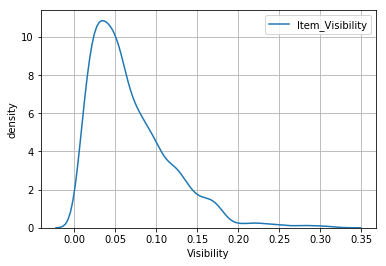

In [60]:
#Plotting density plot of visiblity
sns.kdeplot(data['Item_Visibility'])
plt.xlabel('Visibility')
plt.ylabel('density')
plt.grid(which='both')
plt.show()

In [59]:
#Drop irrelevant columns

train = train.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'], axis = 1)
test1 = test.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'], axis = 1)

Text(0.5, 1.0, 'Correlation Matrix')

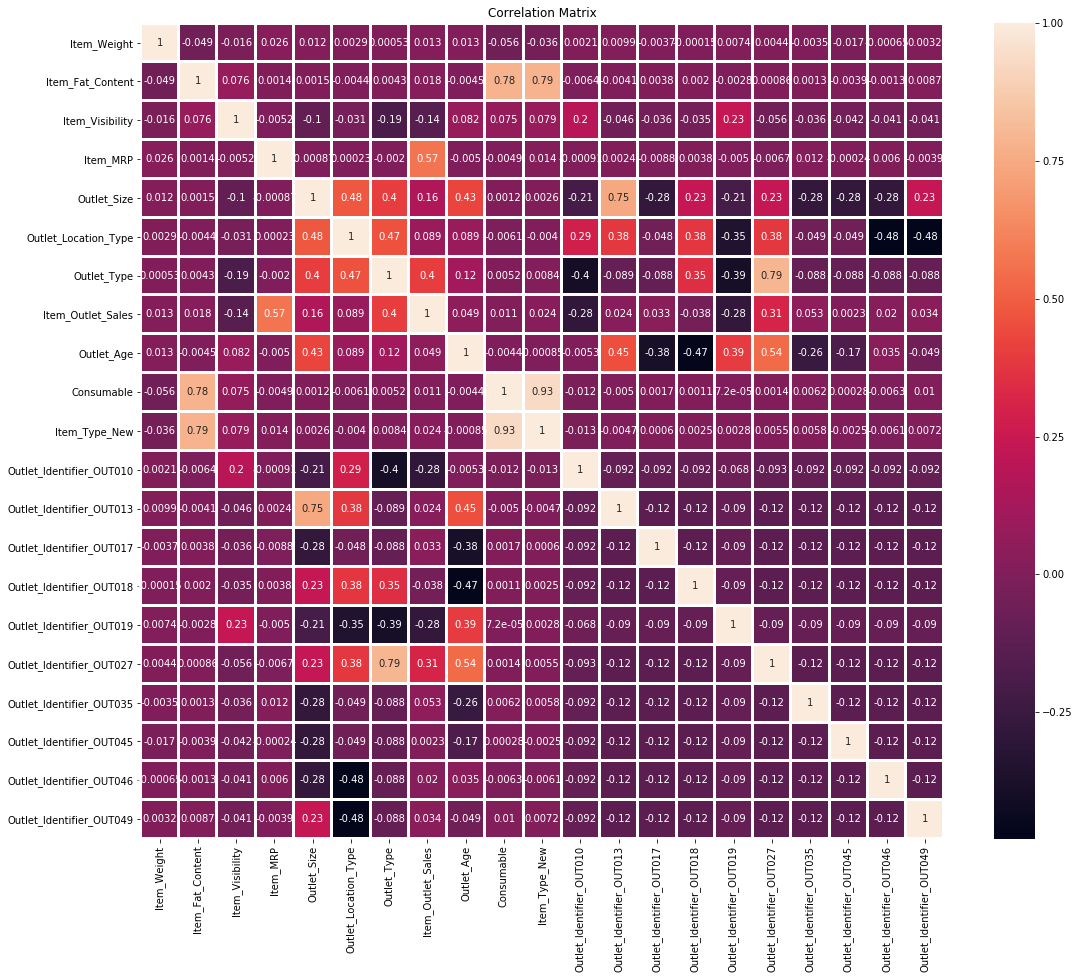

In [61]:
# Correlation matrix between features 
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(train.corr(),linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Matrix')

We can see the correlation between all features.
Particular to us though, we can see that the outlet size and the Item MRP have high correlations with the outlet sales.
Also, some outlet identifiers have strong correlations with the outlet sales.

Creating a new Scaled data set for KNN and SVM models

In [62]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [63]:
MM = MinMaxScaler()
train_Scaled = train
test_Scaled = test1
train_Scaled[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']] = MM.fit_transform(X=train_Scaled[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])
train_Scaled = pd.DataFrame(train_Scaled)
test_Scaled[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']] = MM.fit_transform(X=test_Scaled[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])
test_Scaled = pd.DataFrame(test_Scaled)
train_Scaled.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Consumable,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,1,0.038399,0.927507,2,1,2,3735.1380,0.416667,1,...,0,0,0,0,0,0,0,0,0,1
1,0.081274,2,0.048346,0.072068,2,3,3,443.4228,0.000000,1,...,0,0,0,1,0,0,0,0,0,0
2,0.770765,1,0.040593,0.468288,2,1,2,2097.2700,0.416667,1,...,0,0,0,0,0,0,0,0,0,1
3,0.871986,2,0.265117,0.640093,1,3,1,732.3800,0.458333,1,...,1,0,0,0,0,0,0,0,0,0
4,0.260494,0,0.109788,0.095805,3,3,2,994.7052,0.916667,0,...,0,1,0,0,0,0,0,0,0,0


## Modelling, Algorithm Comparison and Model Evaluation


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
# Create generic function for splitting and printing Rsquare value and RMSE
y = train['Item_Outlet_Sales']
X = train.drop(['Item_Outlet_Sales'], axis=1)
def reg_pred(algo):
    # Create training and test sets
    y = train['Item_Outlet_Sales']
    X = train.drop(['Item_Outlet_Sales'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=99)

    # Create the regressor: reg_all
    reg_all = algo

    # Fit the regressor to the training data
    reg_all.fit(X_train, y_train)

    # Predict on the test data: y_pred
    y_pred = reg_all.predict(X_test)

    # Compute and print R^2 and RMSE
    print("R^2: {}".format(reg_all.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: {}".format(rmse))

In [70]:
#Linear Regression
algo = LinearRegression()
reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("LinearRegression.csv", index=False)

R^2: 0.5699484750440407
Root Mean Squared Error: 1150.4477414128971


In [71]:
#Linear Regression Scaled
algo = LinearRegression()
reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("Linear_Scaled.csv", index=False)

R^2: 0.5699484750440407
Root Mean Squared Error: 1150.4477414128971


In [72]:
#RandomForestRegressor
algo = RandomForestRegressor()

reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("RF.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2: 0.5458547434272722
Root Mean Squared Error: 1182.2356222231494


In [73]:
#RFR Scaled
algo = RandomForestRegressor()

reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("RF_Scaled.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2: 0.5543451405201079
Root Mean Squared Error: 1171.1323377796084


In [74]:
#GBRegressor
algo = GradientBoostingRegressor()

reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("GBR.csv", index=False)

R^2: 0.6089788988355911
Root Mean Squared Error: 1097.0003017019944


In [75]:
#GBR Scaled
algo = GradientBoostingRegressor()

reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("GBR_Scaled.csv", index=False)

R^2: 0.6089780668211502
Root Mean Squared Error: 1097.0014687996324


In [77]:
#SVR
algo = SVR()

reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("SVR.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R^2: -0.011074233740675732
Root Mean Squared Error: 1763.9983366753745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
#SVR Scaled
algo = SVR()

reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("SVR_Scaled.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R^2: -0.011074233740675732
Root Mean Squared Error: 1763.9983366753745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [79]:
#KNN
algo = KNeighborsRegressor()

reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("KNN.csv", index=False)

R^2: 0.5293333979990362
Root Mean Squared Error: 1203.547793405302


In [80]:
#KNN Scaled
algo = KNeighborsRegressor()

reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("KNN_Scaled.csv", index=False)

R^2: 0.5293333979990362
Root Mean Squared Error: 1203.547793405302


In [81]:
#Lasso Regression
algo = Lasso()
reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("Lasso.csv", index=False)

R^2: 0.5700259838722797
Root Mean Squared Error: 1150.3440632843724


In [82]:
#Lasso Regression Scaled
algo = Lasso()
reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("Lasso_Scaled.csv", index=False)

R^2: 0.5700259838722797
Root Mean Squared Error: 1150.3440632843724


In [84]:
#Ridge Regression
algo = Ridge()
reg_pred(algo)
algo.fit(X,y)
solution = algo.predict(test1)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("Ridge.csv", index=False)

R^2: 0.5698687150255621
Root Mean Squared Error: 1150.5544210473147


In [85]:
#Ridge Regression Scaled
algo = Ridge()
reg_pred(algo)
algo.fit(train_Scaled.drop(['Item_Outlet_Sales'],axis=1),train_Scaled.Item_Outlet_Sales)
solution = algo.predict(test_Scaled)
submission = pd.DataFrame({"Item_Identifier": Sample["Item_Identifier"],"Outlet_Identifier": Sample["Outlet_Identifier"],
                           "Item_Outlet_Sales": solution})
submission.to_csv("Ridge_Scaled.csv", index=False)

R^2: 0.5698687150255621
Root Mean Squared Error: 1150.5544210473147


## RESULTS

The worst performing algorithm was the KNN on the unscaled data. However when used on the scaled data, the KNN algorithm performed well. Reducing the RMSE from 2482 to 1246

The Lasso algorithm also performed better on the scaled data than on the unscaled one. RMSE reduced from 2401 to 1202
Same with Ridge regression, Random Forest, Linear regression and SVR.

The decrease in SVR was not as significant as the rest though. RMSE reduced from 1814 to 1757.

The best performing algorithm was the GradientBoosting Regressor. On the normal data, it had a score of 1155. On the scaled data, however, it gave an RMSE score of 1153.

For more understanding on how scaling and the various regression algorithms work, the following resources are recommended:
1. https://www.quora.com/Which-machine-algorithms-require-data-scaling-normalization
2. https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm
3. https://www.dataschool.io/comparing-supervised-learning-algorithms/
4. https://elitedatascience.com/machine-learning-algorithms